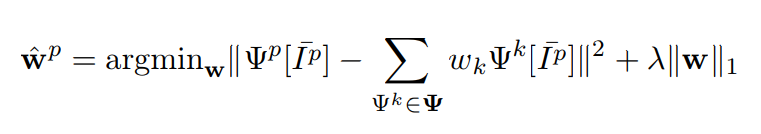

In [23]:
import numpy as np
from ImageProcessing import ImageProcessing
from sklearn.linear_model import Lasso

def filterExpressedPixels(vec):
    return np.nonzero(vec)

def b(patch, dictionary, lamb):
    imp = ImageProcessing()
    # rend le vecteur de poids sur le dictionnaire qui approxime au mieux le patch 
    # (restreint aux pixels exprimés) en utilisant l’algorithme du LASSO.
    # lamb la pénalisation du LASSO (controls the tradeoff between the reconstruction error and the sparsity)

    expPixels = filterExpressedPixels(imp.patch_to_vector(patch))  # vecteur restreint aux pixels exprimés
    normExpPixels = np.linealg.norm(expPixels)
    
    beta = Lasso().fit(expPixels, dictionary) # coefficient sparse
    
    return np.argmin(np.square(np.linalg.norm(expPixels - np.dot(dictionary, beta)), axis=(1,2)) + lamb * normExpPixels)

ValueError: Invalid axis (6, 2) for an array with shape (6, 2)